## Web-Scraping Streamgaging Measurement Data

This notebook demonstrates how to access the USGS streamgaging data from the [NWIS server](https://waterdata.usgs.gov/nwis) using python and pandas


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

The following function will import the field measurement data for a specified USGS 'gageno' (Here is a list of [all Washington State gaging sites](https://waterdata.usgs.gov/nwis/measurements?state_cd=wa&format=station_list&group_key=NONE&set_logscale_y=1&channel_html_info=0&date_format=YYYY-MM-DD&channel_rdb_info=0&rdb_compression=file&list_of_search_criteria=state_cd))

In [2]:
def import_and_save_USGS_measurement_data(gageno):                     
    #USGS Measurement data URL and column names for data link
    url = 'https://waterdata.usgs.gov/nwis/measurements?site_no='+gageno+'&agency_cd=USGS&format=rdb_expanded'
    column_names = ['agency_cd', 'site_no', 'measurement_nu', 'measurement_dt',
                    'tz_cd','q_meas_used_fg', 'party_nm',
                    'site_visit_coll_agency_cd', 'gage_height_va',
                    'discharge_va', 'measured_rating_diff', 'gage_va_change',
                    'gage_va_time','control_type_cd', 'discharge_cd','chan_nu',
                    'chan_name', 'meas_type', 'streamflow_method',
                    'velocity_method', 'chan_discharge', 'chan_width',
                    'chan_area','chan_velocity', 'chan_stability',
                    'chan_material', 'chan_evenness', 'long_vel_desc',
                    'horz_vel_desc', 'vert_vel_desc', 'chan_loc_cd',
                    'chan_loc_dist'] 
    
    #Import site data
    measdata = pd.read_csv(url, header=1, sep='\t', comment='#', 
                           names = column_names)  
    measdata.to_csv(r'USGS_gageno_%s_measurement_data.csv' 
                    %(gageno))

Here we will import USGS gage number 122013100 corresponding to the [Nooksack at Ferndale site](https://waterdata.usgs.gov/nwis/measurements/?site_no=12213100). After running this code block, you should see a `.csv` file downloaded to your local directory.

In [3]:
USGS_gageno = '12213100'
import_and_save_USGS_measurement_data(USGS_gageno)

Load this data

In [4]:
meas_data = pd.read_csv(r'USGS_gageno_%s_measurement_data.csv'%(USGS_gageno))

In [5]:
meas_data.head()

,Unnamed: 0,agency_cd,site_no,measurement_nu,measurement_dt,tz_cd,q_meas_used_fg,party_nm,site_visit_coll_agency_cd,gage_height_va,...,chan_area,chan_velocity,chan_stability,chan_material,chan_evenness,long_vel_desc,horz_vel_desc,vert_vel_desc,chan_loc_cd,chan_loc_dist
0,0,USGS,12213100,1,1966-11-10,NaN,Yes,JC,USGS,4.95,...,NaN,NaN,UNSP,UNSP,UNSP,unkn,UNSP,UNSP,UNSP,NaN
1,1,USGS,12213100,2,1966-11-23,NaN,Yes,JC,USGS,5.59,...,NaN,NaN,UNSP,UNSP,UNSP,unkn,UNSP,UNSP,UNSP,NaN
2,2,USGS,12213100,3,1966-12-13,NaN,Yes,T H,USGS,14.40,...,NaN,NaN,UNSP,UNSP,UNSP,unkn,UNSP,UNSP,UNSP,NaN
3,3,USGS,12213100,4,1966-12-14,NaN,Yes,RQ,USGS,16.46,...,NaN,NaN,UNSP,UNSP,UNSP,unkn,UNSP,UNSP,UNSP,NaN
4,4,USGS,12213100,5,1966-12-28,NaN,Yes,RQ,USGS,6.74,...,NaN,NaN,UNSP,UNSP,UNSP,unkn,UNSP,UNSP,UNSP,NaN


Convert the date measurements into a datetime object

In [6]:
meas_data['DateTime'] = pd.to_datetime(meas_data.measurement_dt)

Convert feet to meters:

In [7]:
fttom = 0.3048

meas_data['gage_height_m'] = meas_data['gage_height_va']*fttom
meas_data['discharge_cms'] = meas_data['discharge_va']*(fttom**3)

Plot the field measurement stage and discharge measurements. Points are colored by the year the measurement was obtained to visualize prospective shifts over time

Text(0.5, 1.0, 'Measurement Data (Gage #: 12213100)')

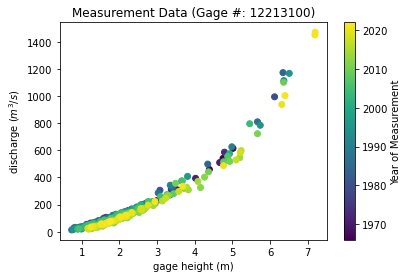

In [8]:
f, ax = plt.subplots()
pts=ax.scatter(
    meas_data.gage_height_m,
    meas_data.discharge_cms,
    c=meas_data.DateTime.dt.year,
)
plt.colorbar(pts, label='Year of Measurement')
ax.set_xlabel('gage height (m)')
ax.set_ylabel(r'discharge $(m^3/s)$')
ax.set_title('Measurement Data (Gage #: %s)'%USGS_gageno)

In [9]:
def import_and_save_current_USGS_rating(gageno):
    url = 'https://waterdata.usgs.gov/nwisweb/get_ratings?site_no=' + gageno + '&file_type=exsa'
    column_names = ['H (ft)', 'SHIFT', 'Q (cfs)', 'STOR']
    curvedata = pd.read_csv(url, header=1, sep='\t', comment='#', names = column_names)
    curvedata.to_csv(r'USGS_gageno_%s_current_rating.csv' 
                    %(gageno))    

In [10]:
import_and_save_current_USGS_rating(USGS_gageno)

In [11]:
curve_data = pd.read_csv(r'USGS_gageno_%s_current_rating.csv'%(USGS_gageno))

In [12]:
curve_data.head()

,Unnamed: 0,H (ft),SHIFT,Q (cfs),STOR
0,0,2.75,0.0,297.00,*
1,1,2.76,0.0,301.31,NaN
2,2,2.77,0.0,305.65,NaN
3,3,2.78,0.0,310.02,NaN
4,4,2.79,0.0,314.41,NaN


Text(0.5, 1.0, 'Measurement Data & Rating (Gage #: 12213100)')

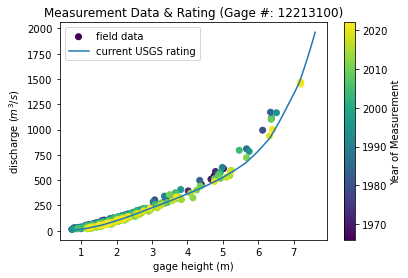

In [13]:
f, ax = plt.subplots()
pts=ax.scatter(
    meas_data.gage_height_m[meas_data.gage_height_m < 40],
    meas_data.discharge_cms[meas_data.gage_height_m < 40],
    c=meas_data.DateTime.dt.year[meas_data.gage_height_m < 40],
    label='field data',
)
ax.plot(
    curve_data['H (ft)']*fttom,
    curve_data['Q (cfs)']*fttom**3,
    label='current USGS rating',
)
ax.legend()        
plt.colorbar(pts, label='Year of Measurement')
ax.set_xlabel('gage height (m)')
ax.set_ylabel(r'discharge $(m^3/s)$')
ax.set_title('Measurement Data & Rating (Gage #: %s)'%USGS_gageno)